# Tech-A-Thon 

# Team_Sout

## Team Leader :- 
Name             :- Saharsh Gupta

Email            :- saharsh.gupta06@gmail.com

## Team Members :-

Member 1 :-

 Name :- Rishav Singh Solanki
 
 Email :- solankirishavsingh@gmail.com

 Member 2 :-
 
 Name :-  Kshitij Raj
 
 Email :- kshitijraj001@gmail.com

## Project Name :- Car Price Predictor

### Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error


### Reading Dataset


In [2]:
df = pd.read_csv('audi.csv')


### Description of dataset :-

It contains scraped data of used cars listings. 10,000 listings, which have 
been merged from corresponding car manufacturer. The cleaned 
data set contains information of price, transmission, mileage, fuel 
type, road tax, miles per gallon (mpg), and engine size. Then 
made a more general car value regression model.

In [3]:
# Declaring X and Y variables. 
# The price of the car to be predicted, has been assigned to Y and the other features to X.

X = df.iloc[:,[0,1,3,4,5,6,7,8]].values
Y = df.iloc[:,[2]].values


In [4]:
# Printing the X variable (other features)

print(X)

[[' A1' 2017 'Manual' ... 150 55.4 1.4]
 [' A6' 2016 'Automatic' ... 20 64.2 2.0]
 [' A1' 2016 'Manual' ... 30 55.4 1.4]
 ...
 [' A3' 2020 'Manual' ... 150 49.6 1.0]
 [' Q3' 2017 'Automatic' ... 150 47.9 1.4]
 [' Q3' 2016 'Manual' ... 150 47.9 1.4]]


In [5]:
# Printing the price

print(Y)

[[12500]
 [16500]
 [11000]
 ...
 [17199]
 [19499]
 [15999]]


In [6]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,2))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

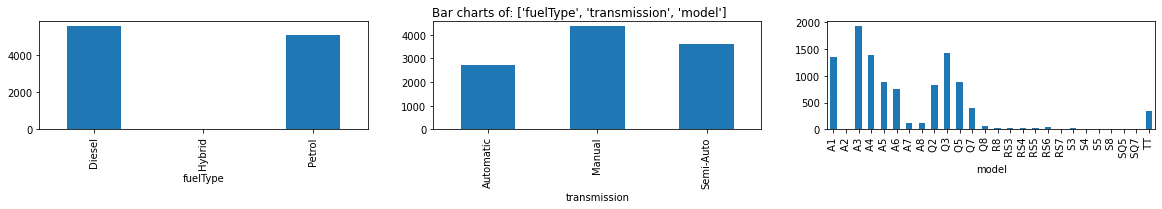

In [7]:
# Calling the function
PlotBarCharts(inpData=df, colsToPlot=['fuelType', 'transmission', 'model'])

#### Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

##### Selected Categorical Variables:
'fuelType', 'tax', 'mpg','transmission', 'mileage', 'model'

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'mileage'}>],
       [<AxesSubplot:title={'center':'engineSize'}>, <AxesSubplot:>]],
      dtype=object)

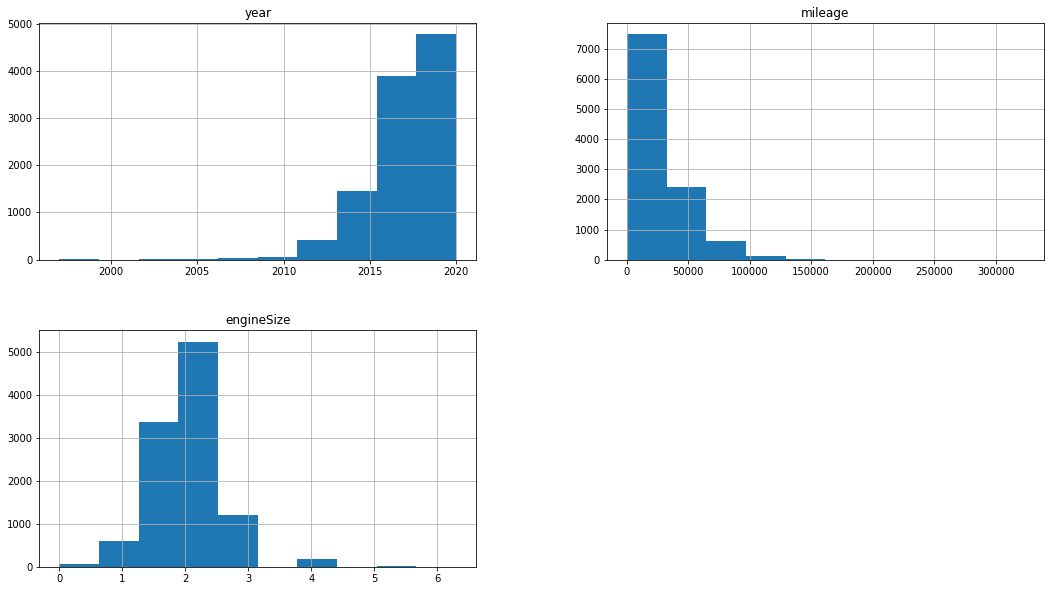

In [8]:
# Plotting histograms of multiple columns together
df.hist(['year','mileage','engineSize'], figsize=(18,10))

#### Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

##### Selected Continuous Variables:

'year','mileage','engineSize'


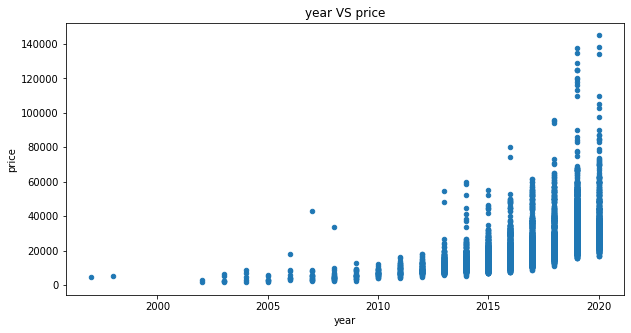

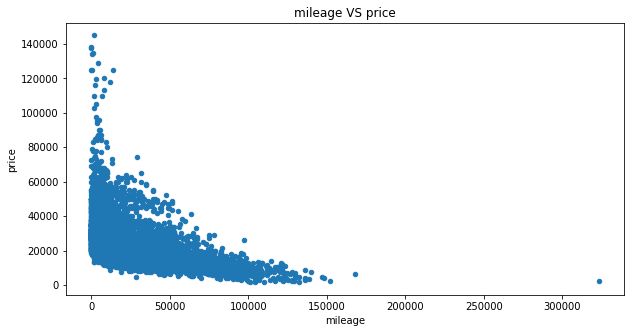

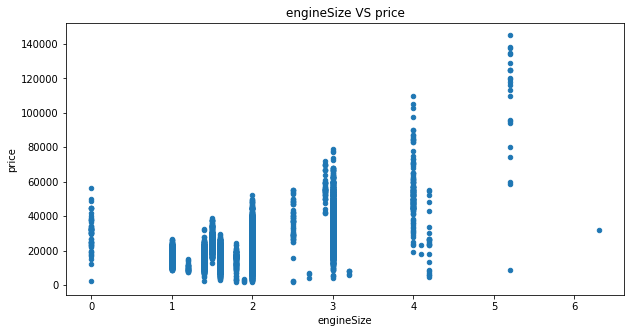

In [9]:
ContinuousCols=['year','mileage','engineSize']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

#### Scatter charts interpretation

Figure 1:- Increasing trend.They are directly proportional to each other, if one value increases, other also increases.

Figure 2:- Decreasing trend.They are inversely proportional to each other, if one value increases, other decreases.

Figure 3:- Increasing trend.They are directly proportional to each other, if one value increases, other also increases.

## Data Preprocessing

### Label Encoding

In [10]:
# Here preprocessing the data into a unique integers based on alphabetical ordering by 
# label encoding in the model and fuel type feature.

# label encoding is used as number of categories is quite large in the model feature and
# one-hot encoding can lead to high memory consumption.

le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,-4] = le2.fit_transform(X[:,-4])

In [11]:
print(X)

[[0 2017 'Manual' ... 150 55.4 1.4]
 [5 2016 'Automatic' ... 20 64.2 2.0]
 [0 2016 'Manual' ... 30 55.4 1.4]
 ...
 [2 2020 'Manual' ... 150 49.6 1.0]
 [9 2017 'Automatic' ... 150 47.9 1.4]
 [9 2016 'Manual' ... 150 47.9 1.4]]


In [12]:
# Here using one-hot encoding, converted transmission feature into one-hot vector.
# The number of categorical features is less in transmission features one-hot encoding can be effectively applied.

ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[2])],remainder='passthrough')
X = ct.fit_transform(X)

In [13]:
print(X)

[[0.0 1.0 0.0 ... 150 55.4 1.4]
 [1.0 0.0 0.0 ... 20 64.2 2.0]
 [0.0 1.0 0.0 ... 30 55.4 1.4]
 ...
 [0.0 1.0 0.0 ... 150 49.6 1.0]
 [1.0 0.0 0.0 ... 150 47.9 1.4]
 [0.0 1.0 0.0 ... 150 47.9 1.4]]


### Feature Scaling

In [14]:
# Used feature scaling to normalise the data within a particular range to bring every feature in the
# same footing without any upfront importance.

sc = StandardScaler()
X = sc.fit_transform(X)

In [15]:
print(X)

[[-0.58326752  1.2007284  -0.71233307 ...  0.35714729  0.35755001
  -0.88021837]
 [ 1.71447913 -0.83282781 -0.71233307 ... -1.57832278  1.03713001
   0.11492465]
 [-0.58326752  1.2007284  -0.71233307 ... -1.42944047  0.35755001
  -0.88021837]
 ...
 [-0.58326752  1.2007284  -0.71233307 ...  0.35714729 -0.09035499
  -1.54364705]
 [ 1.71447913 -0.83282781 -0.71233307 ...  0.35714729 -0.22163749
  -0.88021837]
 [-0.58326752  1.2007284  -0.71233307 ...  0.35714729 -0.22163749
  -0.88021837]]


### Splitting Dataset into Training set and Test set

In [16]:
#  Here splitting the dataset into two parts, one for training purpose and the other for testing purpose to 
#  find the predicted price and compare predicted price with actual price and finding accuracy.

(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=0)

### Training Model

#### Linear Regression

In [17]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)


LinearRegression()

###### Predicting the Test set result

In [18]:
Y_pred = regressor.predict(X_test)

In [19]:
Y_pred

array([[13054.1186593 ],
       [29341.91645716],
       [31897.8869091 ],
       ...,
       [42655.4641769 ],
       [31560.08655166],
       [ 7287.29324952]])

In [20]:
Y_test

array([[14998],
       [21950],
       [28990],
       ...,
       [45995],
       [30500],
       [ 8400]], dtype=int64)

In [21]:
# X_train=np.arange(0,len(X_train),1)

##### Plotting the trained set

In [22]:
# plt.scatter(X_train, Y_train, color = "red")
# plt.plot(X_train, regressor.predict(X_train), color = "blue")
# plt.show()

##### Checking accuracy of the model

In [23]:
accuracy = regressor.score(X_test,Y_test)
print('Accuracy of the model through linear regression is',accuracy*100,'%')

Accuracy of the model through linear regression is 79.16101851751054 %


#### Random Forest Regression

In [24]:
regression = RandomForestRegressor(random_state=0)
regression.fit(X_train,Y_train)

C:\Users\SAHARS~1\AppData\Local\Temp/ipykernel_29196/3145055149.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regression.fit(X_train,Y_train)


RandomForestRegressor(random_state=0)

In [25]:
y_pred = regression.predict(X_test)

##### Testing result

In [26]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[14337.15 14998.  ]
 [23450.35 21950.  ]
 [27330.07 28990.  ]
 ...
 [46275.18 45995.  ]
 [31359.   30500.  ]
 [ 9929.62  8400.  ]]


##### Calculating Accuracy

In [27]:
accuracy1 = r2_score(Y_test, y_pred)
print('Accuracy of the model through random forest is',accuracy1*100,'%')


Accuracy of the model through random forest is 95.36134841307546 %


In [28]:
mean_absolute_error(Y_test,y_pred)

1538.730980670462

Since the accuracy of model by random forest regression is greater than linear regression, hence random forest regression is used.

In [29]:
print(y_pred)

[14337.15 23450.35 27330.07 ... 46275.18 31359.    9929.62]


#### Reshape to 2D

Here reshaping the trained data into a 2D data frame.

In [30]:
print(Y_test)

[[14998]
 [21950]
 [28990]
 ...
 [45995]
 [30500]
 [ 8400]]


In [31]:
y_pred = np.reshape(y_pred,(-1,1))

### Making Pandas DataFrame

In [32]:
mydata = np.concatenate((Y_test,y_pred),axis=1)
dataframe = pd.DataFrame(mydata,columns=['Real Price','Predicted Price'])

In [33]:
print(dataframe)

      Real Price  Predicted Price
0        14998.0         14337.15
1        21950.0         23450.35
2        28990.0         27330.07
3        25489.0         27200.98
4        30950.0         32250.05
...          ...              ...
2129     23700.0         39147.77
2130     18000.0         16679.95
2131     45995.0         46275.18
2132     30500.0         31359.00
2133      8400.0          9929.62

[2134 rows x 2 columns]


### Plotting the graph between True and Predicted price 

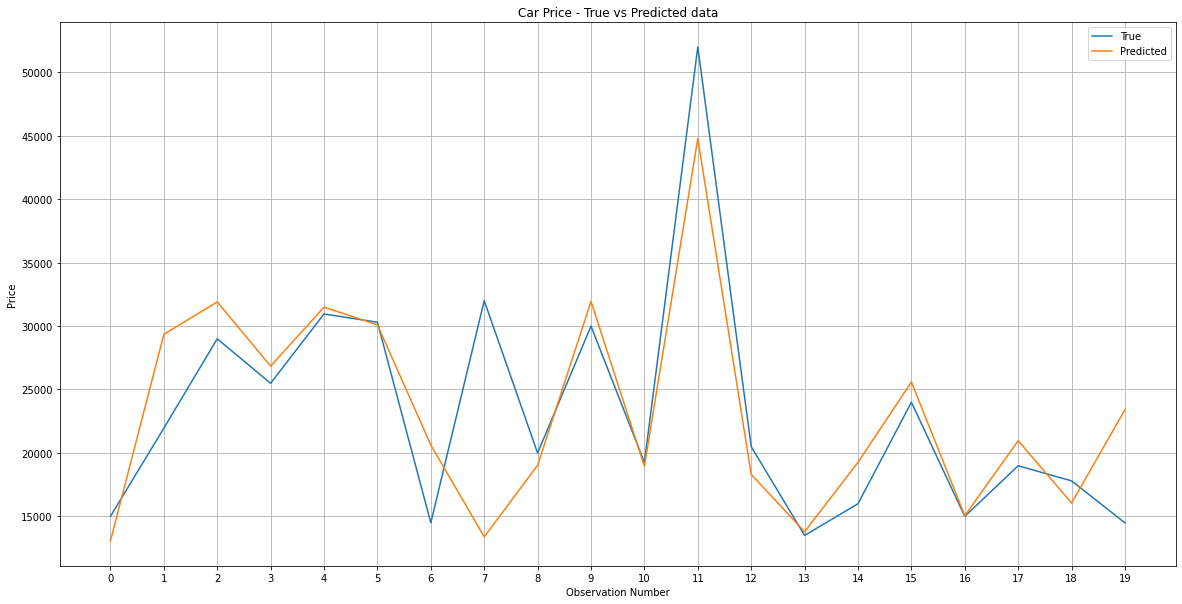

In [34]:
number_of_observations=20
x_ax = range(len(Y_test[:number_of_observations]))
plt.figure(figsize=(20,10))
plt.plot(x_ax, Y_test[:number_of_observations], label="True")
plt.plot(x_ax, Y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()


As seen in the graph above, the true and predicted price are almost same. It confirms model's accuracy visually.